# Models for binary vectors

In [15]:
import numpy as np
import matplotlib.pyplot as plt

np.set_printoptions(precision=6, linewidth=100)

In [16]:
dataset = np.loadtxt('binarydigits.txt')
N, D = dataset.shape

N, D

(100, 64)

We have $N = 100$ images, each with $D = 64$ pixels laid out as a vector, i.e., $\mathbf{x}^{\left(n\right)} \in \mathbb{R}^D,\ \forall n\in \left\{1,\ldots,N\right\}$. 

## 1 (d)

From part (b), we have the ML estimate, $\hat{\mathbf{p}}_{MLE}$, for the parameters $\mathbf{p}$ of a Multivariate Bernoulli distribution:
$$
    \hat{\mathbf{p}}_{MLE} = \frac{1}{N} \sum_{i=1}^N \mathbf{x}^{\left(n\right)}
$$

In [17]:
ml_estimate = np.mean(dataset, axis=0)
ml_estimate_2d = ml_estimate.reshape(8, 8)

ml_estimate_2d

array([[0.13, 0.21, 0.29, 0.43, 0.64, 0.77, 0.69, 0.5 ],
       [0.08, 0.25, 0.45, 0.64, 0.72, 0.7 , 0.79, 0.48],
       [0.13, 0.3 , 0.45, 0.39, 0.27, 0.25, 0.5 , 0.52],
       [0.19, 0.45, 0.48, 0.31, 0.29, 0.25, 0.44, 0.4 ],
       [0.32, 0.39, 0.19, 0.26, 0.23, 0.4 , 0.54, 0.26],
       [0.47, 0.33, 0.13, 0.14, 0.28, 0.44, 0.48, 0.17],
       [0.6 , 0.59, 0.35, 0.44, 0.57, 0.52, 0.29, 0.04],
       [0.28, 0.66, 0.76, 0.77, 0.42, 0.19, 0.05, 0.  ]])

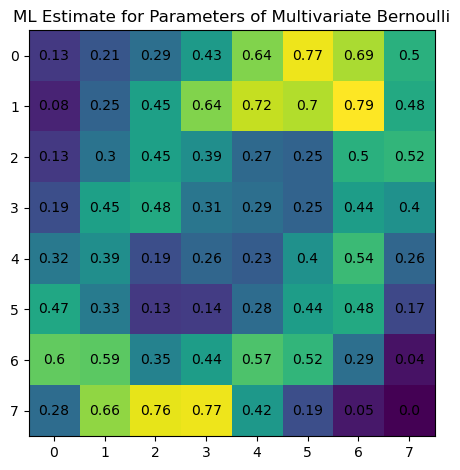

In [18]:
fig, ax = plt.subplots()
im = ax.imshow(ml_estimate_2d)

ax.set_xticks(np.arange(8))
ax.set_yticks(np.arange(8))

for i in range(8):
    for j in range(8):
        text = ax.text(j, i, ml_estimate_2d[i, j], ha='center', va='center', color='black')

ax.set_title('ML Estimate for Parameters of Multivariate Bernoulli')

fig.tight_layout()
plt.show()

## 1 (e)

From part (c), we have the MAP estimate, $\hat{\mathbf{p}}_{MAP} = \left(\hat{p}_1, \ldots, \hat{p}_D\right)$, for the parameters $\mathbf{p} = \left(p_1, \ldots, p_D\right)$ of a Multivariate Bernoulli distribution with independent Beta priors, $p_d \sim Beta\left(\alpha,\beta\right)$:
$$
    \hat{p}_{d} = \frac{\alpha-1+\sum_{i=1}^N x_d^{\left(n\right)}}{\alpha+\beta-2+N}, \quad \forall d\in\left\{1,\ldots,D\right\}
$$

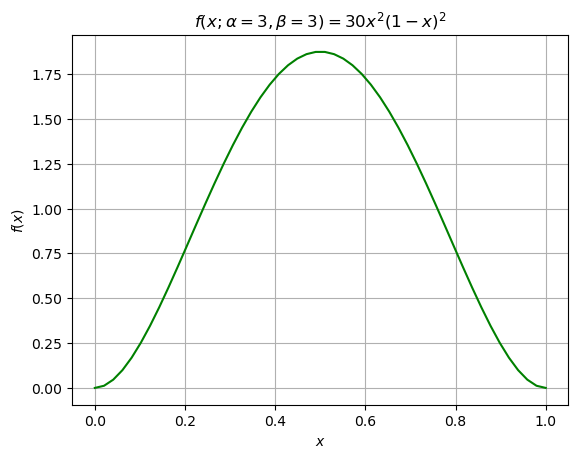

In [5]:
alpha = beta = 3

x = np.linspace(0, 1)
y = 30 * x**2 * (1-x)**2

plt.plot(x, y, color='green')
plt.xlabel(r'$x$')
plt.ylabel(r'$f\left(x\right)$')
plt.title(r'$f\left(x;\alpha=3,\beta=3\right) = 30 x^2 \left(1-x\right)^2$')
plt.grid()
plt.show()

Note that the mode of $Beta\left(\alpha,\beta\right)$ is given as
$$
    \text{arg max}_{x\in[0,1]}\ f\left(x;\alpha,\beta\right) = \text{arg max}_{x\in[0,1]}\ x^{\alpha-1} \left(1-x\right)^{\beta-1} = \frac{\alpha-1}{\alpha+\beta-2}
$$

In [6]:
prior_mode = (alpha-1) / (alpha+beta-2)

prior_mode

0.5

So the *a priori* mode for Bernoulli parameters of all the pixel values is $0.5$. Let's see how this changes after observing the data. 

In [7]:
map_estimate = (alpha-1+np.sum(dataset, axis=0)) / (alpha+beta-2+N)
map_estimate_2d = map_estimate.reshape(8, 8)

map_estimate_2d

array([[0.144231, 0.221154, 0.298077, 0.432692, 0.634615, 0.759615, 0.682692, 0.5     ],
       [0.096154, 0.259615, 0.451923, 0.634615, 0.711538, 0.692308, 0.778846, 0.480769],
       [0.144231, 0.307692, 0.451923, 0.394231, 0.278846, 0.259615, 0.5     , 0.519231],
       [0.201923, 0.451923, 0.480769, 0.317308, 0.298077, 0.259615, 0.442308, 0.403846],
       [0.326923, 0.394231, 0.201923, 0.269231, 0.240385, 0.403846, 0.538462, 0.269231],
       [0.471154, 0.336538, 0.144231, 0.153846, 0.288462, 0.442308, 0.480769, 0.182692],
       [0.596154, 0.586538, 0.355769, 0.442308, 0.567308, 0.519231, 0.298077, 0.057692],
       [0.288462, 0.653846, 0.75    , 0.759615, 0.423077, 0.201923, 0.067308, 0.019231]])

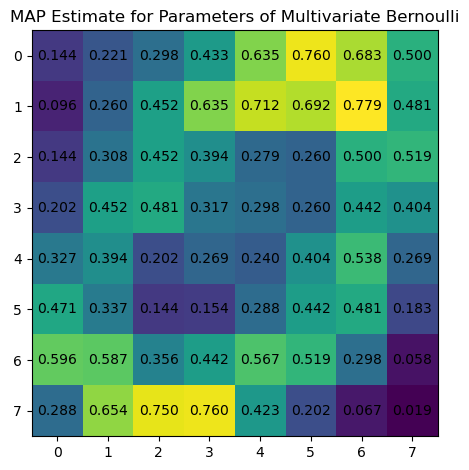

In [8]:
fig, ax = plt.subplots()
im = ax.imshow(map_estimate_2d)

ax.set_xticks(np.arange(8))
ax.set_yticks(np.arange(8))

for i in range(8):
    for j in range(8):
        text = ax.text(j, i, f'{map_estimate_2d[i, j]:.3f}', ha='center', va='center', color='black')

ax.set_title('MAP Estimate for Parameters of Multivariate Bernoulli')

fig.tight_layout()
plt.show()

Note that the MAP estimates are always at least as close to $0.5$, the *a priori* mode, as the MLE estimates.

In [9]:
np.all(np.abs(ml_estimate-0.5) >= np.abs(map_estimate-0.5))

True